# Uber Data

In [2]:
import pandas as pd
uber_data = pd.read_csv('data/uber/uber-raw-data-jul14.csv')
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [6]:
# Correctly dormat datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])
# Provide discrete measurements for the time
uber_data['Date/Time'].dt.floor('1H').head(10)

0   2014-07-01 00:00:00
1   2014-07-01 00:00:00
2   2014-07-01 00:00:00
3   2014-07-01 00:00:00
4   2014-07-01 00:00:00
5   2014-07-01 00:00:00
6   2014-07-01 00:00:00
7   2014-07-01 00:00:00
8   2014-07-01 01:00:00
9   2014-07-01 01:00:00
Name: Date/Time, dtype: datetime64[ns]

In [7]:
# Top 10 Buckets of Hours
hourly_data = uber_data['Date/Time'].dt.floor('1H').value_counts()
hourly_data.head(10)

2014-07-15 18:00:00    3302
2014-07-15 19:00:00    3225
2014-07-15 17:00:00    3045
2014-07-02 18:00:00    2946
2014-07-15 20:00:00    2840
2014-07-23 20:00:00    2791
2014-07-23 21:00:00    2559
2014-07-31 18:00:00    2531
2014-07-23 17:00:00    2519
2014-07-02 17:00:00    2479
Name: Date/Time, dtype: int64

In [8]:
# Chronological
hourly_data = hourly_data.sort_index()
hourly_data.head(10)

2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: Date/Time, dtype: int64

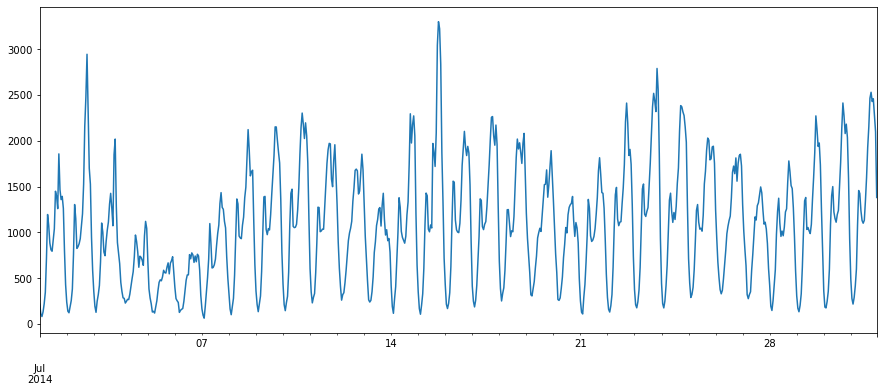

In [9]:
import matplotlib.pyplot as plt
hourly_data.plot(kind='line', figsize=(15,6))
plt.show()

In [59]:
# Number of trips for each hour per weekday
hours = uber_data['Date/Time'].dt.hour
week_day = uber_data['Date/Time'].dt.weekday
date = uber_data['Date/Time'].dt.date

weekly_data = pd.concat([week_day,hours,date], axis=1)
weekly_data.columns = ['Week Day', 'Hour', 'Date']

weekly_data

,Week Day,Hour,Date
0,1,0,2014-07-01
1,1,0,2014-07-01
2,1,0,2014-07-01
3,1,0,2014-07-01
4,1,0,2014-07-01
...,...,...,...
796116,3,23,2014-07-31
796117,3,23,2014-07-31
796118,3,23,2014-07-31
796119,3,23,2014-07-31


In [60]:
import calendar
# Map the day int to the name
weekly_data['Week Day'] = weekly_data['Week Day'].apply(lambda x : calendar.day_name[x])
weekly_data

,Week Day,Hour,Date
0,Tuesday,0,2014-07-01
1,Tuesday,0,2014-07-01
2,Tuesday,0,2014-07-01
3,Tuesday,0,2014-07-01
4,Tuesday,0,2014-07-01
...,...,...,...
796116,Thursday,23,2014-07-31
796117,Thursday,23,2014-07-31
796118,Thursday,23,2014-07-31
796119,Thursday,23,2014-07-31


In [61]:
# Group the entries to be able to get some numbers instead of just a list of occurences
weekly_data = weekly_data.groupby(['Date', 'Week Day', 'Hour']).size()
weekly_data

Date        Week Day  Hour
2014-07-01  Tuesday   0        216
                      1        111
                      2         82
                      3        134
                      4        223
                              ... 
2014-07-31  Thursday  19      2430
                      20      2460
                      21      2275
                      22      2099
                      23      1382
Length: 744, dtype: int64

In [62]:
# Remove the grouping by Date
weekly_data = weekly_data.reset_index()
weekly_data = weekly_data.rename(columns={0: 'Rides'})
weekly_data

,Date,Week Day,Hour,Rides
0,2014-07-01,Tuesday,0,216
1,2014-07-01,Tuesday,1,111
2,2014-07-01,Tuesday,2,82
3,2014-07-01,Tuesday,3,134
4,2014-07-01,Tuesday,4,223
...,...,...,...,...
739,2014-07-31,Thursday,19,2430
740,2014-07-31,Thursday,20,2460
741,2014-07-31,Thursday,21,2275
742,2014-07-31,Thursday,22,2099


In [63]:
# Group by the week day and average in order to get the mean for a given hour on a given weekday
weekly_data = weekly_data.groupby(['Week Day', 'Hour']).mean()['Rides']
weekly_data

Week Day   Hour
Friday     0        615.00
           1        385.25
           2        264.75
           3        307.50
           4        339.75
                    ...   
Wednesday  19      2112.60
           20      2098.20
           21      1950.20
           22      1455.00
           23       825.20
Name: Rides, Length: 168, dtype: float64

In [64]:
# Using unstack in order to view the information better
weekly_data = weekly_data.unstack(level=0)
weekly_data

Week Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,615.00,315.00,1110.25,1090.00,430.0,301.8,354.6
1,385.25,153.25,788.25,829.50,231.4,155.8,193.2
2,264.75,109.75,580.00,638.25,171.0,111.2,156.0
3,307.50,254.75,426.00,477.00,256.6,187.0,224.0
4,339.75,403.75,271.75,245.50,376.8,296.6,326.0
5,497.25,615.25,274.25,231.25,586.2,546.0,559.8
6,736.75,911.00,303.50,256.75,959.2,962.2,1003.4
7,1008.00,1266.50,398.50,316.25,1341.8,1350.0,1425.8
8,1038.00,1199.25,525.25,466.75,1336.6,1332.4,1425.0


In [66]:
col_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
display = weekly_data
display = display.reindex(columns=col_order)
display

Week Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,315.00,301.8,354.6,430.0,615.00,1110.25,1090.00
1,153.25,155.8,193.2,231.4,385.25,788.25,829.50
2,109.75,111.2,156.0,171.0,264.75,580.00,638.25
3,254.75,187.0,224.0,256.6,307.50,426.00,477.00
4,403.75,296.6,326.0,376.8,339.75,271.75,245.50
5,615.25,546.0,559.8,586.2,497.25,274.25,231.25
6,911.00,962.2,1003.4,959.2,736.75,303.50,256.75
7,1266.50,1350.0,1425.8,1341.8,1008.00,398.50,316.25
8,1199.25,1332.4,1425.0,1336.6,1038.00,525.25,466.75


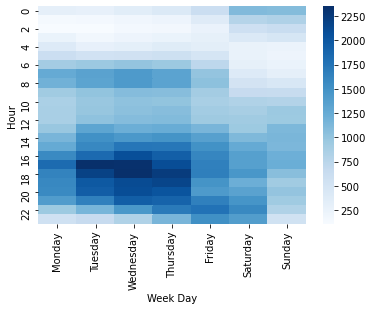

In [68]:
import seaborn as sns
sns.heatmap(display, cmap='Blues')